In [ ]:
import pandas as pd
import numpy as np
import plotly.express as plotly
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_csv("final_dataset_v2.csv")
relevant_columns = ['total_demand', 'max_generation', 'month', 'year']
data1 = data1[relevant_columns]
data1 = data1.groupby(['month', 'year']).agg({'total_demand(mw)': 'sum','max_generation(mw)': 'sum'}).reset_index()
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
data1['month'] = data1['month'].map(month_mapping)

In [ ]:
data3 = pd.read_csv("DUKES_1.1.7", header = None)
merged_df = pd.merge(data3, data1, on='month', how='inner')
data4 = pd.read_csv("ET_7.2_AUG_24", header = None)
merged_df2 = pd.merge(data4, merged_df, on='month', how='inner')
data5 = pd.read_csv("ET_7.3_AUG_24", header = None)
merged_df3 = pd.merge(data5, merged_df2, on='month', how='inner')
data6 = pd.read_csv("ET_7.4_AUG_24", header = None)
merged_df4 = pd.merge(data6, merged_df3, on='month', how='inner')
merged_df4.to_csv("Updated_Data_with_Month_Names.csv", index=False)

In [ ]:
data2 = pd.read_csv("Updated_Data_with_Month_Names.csv", header = None)

In [ ]:
data2.head(5)

,0,1,2,3,4,5,6,7
0,month,year,total_demand(mw),max_generation(mw),mean_air_temperature(C),average_wind_speed(m/s),average_daily_sun_hours,average_monthly_rainfall(mm)
1,January,2018,247100,241562,5.3,NaN,NaN,NaN
2,January,2019,253200,250919,4.2,NaN,NaN,NaN
3,January,2020,230940,268275,6.7,NaN,NaN,NaN
4,January,2021,266350,279193,3.3,7.5,1.4,217.0


In [ ]:
data2.columns = data2.iloc[0]
data2 = data2[1:]
data2.reset_index(drop=True, inplace=True)
data2.head(5)

,month,year,total_demand(mw),max_generation(mw),mean_air_temperature(C),average_wind_speed(m/s),average_daily_sun_hours,average_monthly_rainfall(mm)
0,January,2018,247100,241562,5.3,NaN,NaN,NaN
1,January,2019,253200,250919,4.2,NaN,NaN,NaN
2,January,2020,230940,268275,6.7,NaN,NaN,NaN
3,January,2021,266350,279193,3.3,7.5,1.4,217.0
4,January,2022,277047,284597,5.2,9.1,2.6,109.9


In [ ]:
data2.isnull().sum()

,0
0,
month,0
year,0
total_demand(mw),0
max_generation(mw),0
mean_air_temperature(C),0
average_wind_speed(m/s),36
average_daily_sun_hours,36
average_monthly_rainfall(mm),36


In [ ]:
for i in ['average_wind_speed(m/s)','average_daily_sun_hours','average_monthly_rainfall(mm)','total_demand(mw)','max_generation(mw)']:
    data2[i] = pd.to_numeric(data2[i], errors='coerce')

In [ ]:
from sklearn.base import TransformerMixin

class GroupImputer(TransformerMixin):
    def __init__(self, group_cols, target_cols):
        self.group_cols = group_cols
        self.target_cols = target_cols

    def fit(self, X, y=None):
        self.group_means = {
            col: X.groupby(self.group_cols)[col].mean() for col in self.target_cols
        }
        return self

    def transform(self, X):
        for col in self.target_cols:
            X[col] = X.groupby(self.group_cols)[col].transform(lambda x: x.fillna(x.mean()))
        return X

group_imputer = GroupImputer(group_cols=['month'], target_cols=['average_wind_speed(m/s)', 'average_monthly_rainfall(mm)', 'average_daily_sun_hours'])
data2 = group_imputer.fit_transform(data2)

data2.isnull().sum()


,0
0,
month,0
year,0
total_demand(mw),0
max_generation(mw),0
mean_air_temperature(C),0
average_wind_speed(m/s),0
average_daily_sun_hours,0
average_monthly_rainfall(mm),0


In [ ]:
mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
data2['month'] = data2['month'].map(mapping)
data2.head(5)

,month,year,total_demand(mw),max_generation(mw),mean_air_temperature(C),average_wind_speed(m/s),average_daily_sun_hours,average_monthly_rainfall(mm)
0,1,2018,247100,241562,5.3,8.9,2.133333,164.466667
1,1,2019,253200,250919,4.2,8.9,2.133333,164.466667
2,1,2020,230940,268275,6.7,8.9,2.133333,164.466667
3,1,2021,266350,279193,3.3,7.5,1.400000,217.000000
4,1,2022,277047,284597,5.2,9.1,2.600000,109.900000


In [ ]:
numeric_data = data2[['year', 'month', 'total_demand(mw)','max_generation(mw)','mean_air_temperature(C)','average_wind_speed(m/s)','average_daily_sun_hours','average_monthly_rainfall(mm)']]
corr = numeric_data.corr()
print(corr)

0                                 year     month  total_demand(mw)  \
0                                                                    
year                          1.000000 -0.129944          0.336469   
month                        -0.129944  1.000000          0.177652   
total_demand(mw)              0.336469  0.177652          1.000000   
max_generation(mw)            0.485227  0.125325          0.951801   
mean_air_temperature(C)      -0.066381  0.326096          0.691326   
average_wind_speed(m/s)       0.090374 -0.278760         -0.575607   
average_daily_sun_hours      -0.018786 -0.117245          0.681236   
average_monthly_rainfall(mm) -0.055897  0.133448         -0.468437   

0                             max_generation(mw)  mean_air_temperature(C)  \
0                                                                           
year                                    0.485227                -0.066381   
month                                   0.125325                 0.3

<Axes: xlabel='0', ylabel='0'>

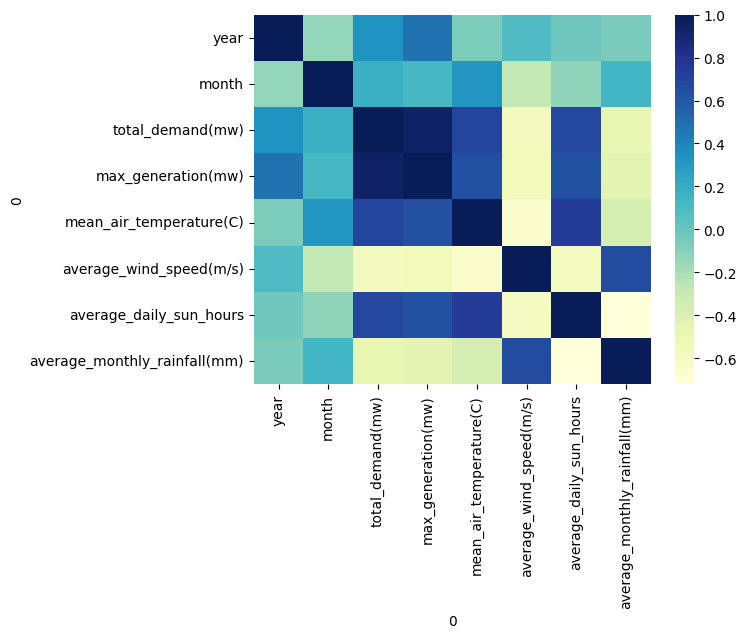

In [ ]:
import seaborn as sns

sns.heatmap(corr, cmap = 'YlGnBu')

In [ ]:
data2.drop(columns=['max_generation(mw)'], inplace=True)

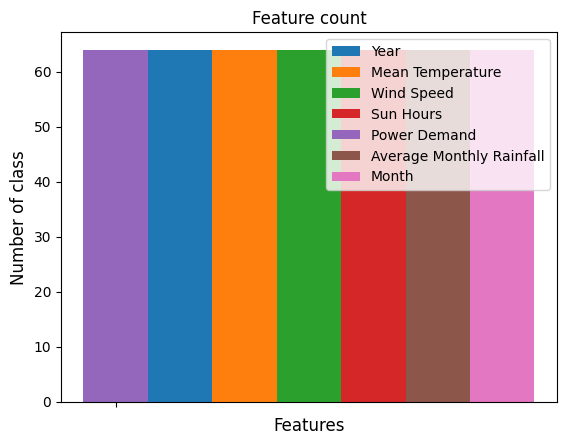

In [ ]:
values= ['']
a= [len(data2['total_demand(mw)'])]
b= [len(data2['year'])]
c= [len(data2['mean_air_temperature(C)'])]
d= [len(data2['average_wind_speed(m/s)'])]
e = [len(data2['average_daily_sun_hours'])]
f = [len(data2['average_monthly_rainfall(mm)'])]
g = [len(data2['month'])]

x_axis= np.arange(len(values))

plt.bar(x_axis+0.1, b, width=0.1, label = 'Year')
plt.bar(x_axis+0.2, c, width=0.1, label = 'Mean Temperature')
plt.bar(x_axis+0.3, d, width=0.1, label = 'Wind Speed')
plt.bar(x_axis+0.4, e, width=0.1, label = 'Sun Hours')
plt.bar(x_axis, a, width=0.1, label = 'Power Demand')
plt.bar(x_axis+0.5, f, width=0.1, label = 'Average Monthly Rainfall')
plt.bar(x_axis+0.6, g, width=0.1, label = 'Month')

plt.xticks(x_axis, values)
plt.xlabel("Features", fontsize= 12)
plt.ylabel("Number of class", fontsize= 12)
plt.title('Feature count')

plt.legend()
plt.show()

In [ ]:
y = data2['total_demand(mw)']
x = data2[['year','mean_air_temperature(C)','average_wind_speed(m/s)','average_daily_sun_hours','average_monthly_rainfall(mm)','month']]

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

rfr = RandomForestRegressor(n_estimators=100, random_state=10)
rfr.fit(X_train, y_train)

y_pred= rfr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

r2_random_forest= rfr.score(X_test, y_test)


print(("R2 score: {:.2f}".format((r2_random_forest)*100))+ "%")
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Training accuracy: {:.2f}".format(rfr.score(X_train, y_train)*100)+'%')
print("Testing accuracy: {:.2f}".format(rfr.score(X_test, y_test)*100)+'%')


R2 score: 52.10%
Mean Squared Error (MSE): 1313051150.36
Root Mean Squared Error (RMSE): 36236.05
Training accuracy: 96.86%
Testing accuracy: 52.10%


## **ANN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense






X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


history = model.fit(X_train, y_train, epochs=1500, batch_size=32, verbose=1, validation_data=(X_test, y_test))


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, train_pred)

test_r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²) Score: {r2}')
print(f'Training Accuracy (R²): {train_r2}')
print(f'Testing Accuracy (R²): {test_r2}')

Epoch 1/1500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - loss: 101627772928.0000 - mean_squared_error: 101627772928.0000 - val_loss: 96246956032.0000 - val_mean_squared_error: 96246956032.0000
Epoch 2/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 99690381312.0000 - mean_squared_error: 99690381312.0000 - val_loss: 96203161600.0000 - val_mean_squared_error: 96203161600.0000
Epoch 3/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 101351800832.0000 - mean_squared_error: 101351800832.0000 - val_loss: 96159875072.0000 - val_mean_squared_error: 96159875072.0000
Epoch 4/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 101169397760.0000 - mean_squared_error: 101169397760.0000 - val_loss: 96116768768.0000 - val_mean_squared_error: 96116768768.0000
Epoch 5/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 100679360512.0000 - mean_squared_error: 100679376896.0000 - val_loss: 96073768960.0000 - val_mean_squared_error: 96073768960.0000
Epoch 6/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1020493742

# **MLR**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlr_model = LinearRegression()

mlr_model.fit(X_train, y_train)

y_pred = mlr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_mlr = r2_score(y_test, y_pred)


train_pred = mlr_model.predict(X_train)
train_r2_mlr = r2_score(y_train, train_pred)


print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²) Score: {r2_mlr}')
print(f'Training Accuracy (R²): {train_r2}')
print(f'Testing Accuracy (R²): {r2_mlr}')


Mean Squared Error (MSE): 871724069.0383548
Root Mean Squared Error (RMSE): 29524.97365008739
R-squared (R²) Score: 0.5395279337228881
Training Accuracy (R²): 0.11596834642951614
Testing Accuracy (R²): 0.5395279337228881


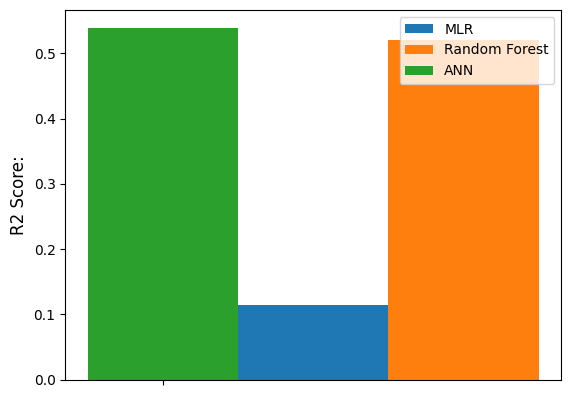

In [ ]:
values= ['']
a= [r2_mlr]
b= [test_r2]
e= [r2_random_forest]

x_axis= np.arange(len(values))

plt.bar(x_axis+0.1, b, width=0.1, label = 'MLR')
plt.bar(x_axis+0.2, e, width=0.1, label = 'Random Forest')
plt.bar(x_axis, a, width=0.1, label = 'ANN')

plt.xticks(x_axis, values)
plt.ylabel("R2 Score:", fontsize= 12)


plt.legend()
plt.show()